# DATA 620, Project 3

### Groups and Members

####Team 1: *Mauricio Alarcon, Sekhar Mekala, Aadi Kalloo, Srinivasa Illapani, Param Singh*
####Team 2: *Christophe Hunt, Joel Park, Ilya Kats, Pavan Akula, Nathan (Seoungyoon) Lim*
####Team 3: *Blandon Casenave, Kelly Shaffer, Michael Muller, Xiomeng (Vivian) Kong, Raphael Nash *
####Team 4: *John Grando, Nick Capofari, Ken Markus, Armenoush Aslanian-Persico, Andrew Goldberg*
####Team 5: *Georgia Galanopoulos, Arindam Barman, Christopher Fenton, Sanjive Kumar *

### Project Requirements

**This is a Team Project!  For this project, please work with the entire class as one collaborative group!  Your project should be submitted (as an IPython Notebook via GitHub) by end of day on Monday, July 10th.  The group should present their code and findings in our meet-up on Tuesday July 11th.**


Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can. Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set. How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect? 

In [98]:
from nltk.corpus import names as names_ntlk
import nltk
import pandas as pd
import matplotlib
import statistics
import scipy
from IPython.display import display
%matplotlib inline
matplotlib.style.use('ggplot')

nltk.download("names")

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Georgia\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

## Data Loading

In [4]:
import random
names = ([( name, 'male') for name in names_ntlk.words('male.txt')] + [( name, 'female') for name in names_ntlk.words('female.txt')]) 
random.seed(1234)
random.shuffle(names)
print display(pd.DataFrame({"name":[i[0] for i in names[:10]], "tag":[i[1] for i in names[:10]]}))


,name,tag
0,Garwin,male
1,Cindie,female
2,Juanita,male
3,Dael,female
4,Jillayne,female
5,Sean,male
6,Nell,female
7,Christie,male
8,Shannen,female
9,Jessamine,female


None


In [99]:
# Length of names
len(names)

7944

In [6]:
# Test set
test_dataset = names[:500]
print "test_dataset: ", len(test_dataset)

# Error-analysis set
devtest_dataset = names[500:1000]
print "devtest_dataset: ", len(devtest_dataset)

# Training set
train_dataset = names[1000:]
print "train_dataset: ", len(train_dataset)

test_dataset:  500
devtest_dataset:  500
train_dataset:  6944


## Model Building: Naive Bayes

### Baseline Model

Calculate the accuracy for the initial model which takes into consideration the last letter of each name.

In [185]:
# Book's classifier - baseline
def gender_features( word):
    w = word.lower()
    return {'last_letter': w[-1]} 

test_featureset = [(gender_features(n),g) for (n,g) in test_dataset]
devtest_featureset = [(gender_features(n),g) for (n,g) in devtest_dataset]
train_featureset = [(gender_features(n),g) for (n,g) in train_dataset]

classifier = nltk.NaiveBayesClassifier.train( train_featureset)

print ('Accuracy: %4.2f' %nltk.classify.accuracy( classifier, devtest_featureset))


Accuracy: 0.75


Add some features to it one at a time, such as:

* Last Trigram - Last three letters
* First Trigram - First three letters
* First Four-gram - First four letters
* Entropy - Measure of how "disorganized" labels are

and see if accuracy increases/decreases.

### Baseline + Last Trigram
Last letter and last three letters

In [7]:
#from nltk.classify import apply_features
def gender_features( word):
    w = word.lower()
    return {'last_letter': w[-1],'last_trigram': w[-3:]} #,'last_bigram': word[-2:]

test_featureset = [(gender_features(n),g) for (n,g) in test_dataset]
devtest_featureset = [(gender_features(n),g) for (n,g) in devtest_dataset]
train_featureset = [(gender_features(n),g) for (n,g) in train_dataset]
print test_featureset[1]
classifier = nltk.NaiveBayesClassifier.train( train_featureset)

print 'Accuracy: %4.2f' %nltk.classify.accuracy( classifier, devtest_featureset)


({'last_letter': u'e', 'last_trigram': u'die'}, 'female')
Accuracy: 0.77


### Baseline + Last Trigram + First Trigram + First Four-gram
Last letter, last three letters, first three letters and first four letters

In [62]:
#from nltk.classify import apply_features
def gender_features( word):
    w = word.lower()
    return {'last_letter': w[-1],'last_trigram': w[-3:],'first_trigram': w[:3], 'first_fourgram': w[:4]} #,'last_bigram': word[-2:]

test_featureset = [(gender_features(n),g) for (n,g) in test_dataset]
devtest_featureset = [(gender_features(n),g) for (n,g) in devtest_dataset]
train_featureset = [(gender_features(n),g) for (n,g) in train_dataset]
print test_featureset[1]
classifier = nltk.NaiveBayesClassifier.train( train_featureset)

print 'Accuracy: %4.2f' %nltk.classify.accuracy( classifier, devtest_featureset)

({'first_trigram': u'cin', 'last_letter': u'e', 'first_fourgram': u'cind', 'last_trigram': u'die'}, 'female')
Accuracy: 0.85


### Baseline + Last Trigram + First Trigram + First Four-gram + Entropy

Per the text and section on the NLTK site, entropy measures how disorganized the input variables are. This can however be used as an alternative method for identifying the most informative features by creating stumps for each branch of the decision tree and comparing the organization levels before and after via the entropy method. For this project, likely not needed as we will utilize the show_most_informative_features() NLTK method.

In [95]:
#from nltk.classify import apply_features
#textbook method
import math 
def entropy( labels): 
    freqdist = nltk.FreqDist( labels) 
    probs = [freqdist.freq( l) for l in nltk.FreqDist( labels)] 
    return -sum([ p * math.log( p, 2) for p in probs])

    
def gender_features( word):
    w = word.lower()
    return {'last_letter': w[-1],'last_trigram': w[-3:],'first_trigram': w[:3], 'first_fourgram': w[:4], 'entropy': entropy(list(w))} #,'last_bigram': word[-2:]

test_featureset = [(gender_features(n),g) for (n,g) in test_dataset]
devtest_featureset = [(gender_features(n),g) for (n,g) in devtest_dataset]
train_featureset = [(gender_features(n),g) for (n,g) in train_dataset]
print test_featureset[1]
classifier = nltk.NaiveBayesClassifier.train( train_featureset)

print 'Accuracy: %4.2f' %nltk.classify.accuracy( classifier, devtest_featureset)


({'first_trigram': u'cin', 'entropy': 2.2516291673878226, 'last_letter': u'e', 'first_fourgram': u'cind', 'last_trigram': u'die'}, 'female')
Accuracy: 0.84


### Looking at Entropy and Model Performance

In [96]:
# Seeing individual cases of where the model guessed incorrectly
errors = []
for (name, tag) in devtest_dataset:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

In [97]:
for (tag, guess, name) in sorted(errors):
    print 'correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name)

correct=female   guess=male     name=Aimil                         
correct=female   guess=male     name=Ambur                         
correct=female   guess=male     name=Beitris                       
correct=female   guess=male     name=Beulah                        
correct=female   guess=male     name=Blair                         
correct=female   guess=male     name=Brooke                        
correct=female   guess=male     name=Cody                          
correct=female   guess=male     name=Emmy                          
correct=female   guess=male     name=Ethelind                      
correct=female   guess=male     name=Ethyl                         
correct=female   guess=male     name=Francis                       
correct=female   guess=male     name=Franny                        
correct=female   guess=male     name=Glynis                        
correct=female   guess=male     name=Hayley                        
correct=female   guess=male     name=Hester     

Going through the list, it appeared that one of the potential difficulties the model faced was determining the classification of names that contained the letter "y". 

In [11]:
#sample entropy from text
print entropy(['male','male','male','male'])
print entropy(['male','female','male','male'])
print entropy(['female','male','female','male'])
print entropy(['female','female','male','female'])
print entropy(['female','female','female','female'])

-0.0
0.811278124459
1.0
0.811278124459
-0.0


Entropy for input labels

In [12]:
entropy_input = [item[1] for item in names]
#entropy_input[:10] -- sanity check for input

print entropy(entropy_input)

0.951030970455


Entropy is close to to 1 and is considered high. This means that there is a wide variety of labels and they are at a "medium" frequency - P(l) and log2P(l) are not small. Attempting to run entropy against a single decision stump (only one level) based on the first classifier with the text's gender features

In [13]:
classifier.classify( gender_features('Mauricio'))


'male'

In [14]:
# Confusion Matrix of devtest
preds = pd.DataFrame({'observed':[gender for (f,gender) in devtest_dataset],'predicted': [classifier.classify(gender_features(n)) for (n,g) in devtest_dataset]})
pd.crosstab(preds.observed,preds.predicted)

predicted,female,male
observed,,
female,283,40
male,39,138


In [18]:
#print 'Precision: %4.2f' %nltk.classify.precision( classifier, devtest_featureset)
cm = nltk.ConfusionMatrix([gender for (f,gender) in devtest_featureset], [classifier.classify(gender_features(n)) for (n,g) in devtest_dataset])
#[(gender_features(n),g) for (n,g) in devtest_dataset]

In [16]:
print cm

       |   f     |
       |   e     |
       |   m   m |
       |   a   a |
       |   l   l |
       |   e   e |
-------+---------+
female |<283> 40 |
  male |  39<138>|
-------+---------+
(row = reference; col = test)



In [43]:
# Which features are most effective for distinguishing the names’ gender:
classifier.show_most_informative_features()


Most Informative Features
             last_letter = u'a'           female : male   =     42.4 : 1.0
            last_trigram = u'nne'         female : male   =     31.1 : 1.0
             last_letter = u'k'             male : female =     29.8 : 1.0
            last_trigram = u'ita'         female : male   =     24.2 : 1.0
            last_trigram = u'ana'         female : male   =     23.4 : 1.0
            last_trigram = u'tta'         female : male   =     22.5 : 1.0
            last_trigram = u'ard'           male : female =     20.2 : 1.0
            last_trigram = u'vin'           male : female =     18.2 : 1.0
            last_trigram = u'old'           male : female =     15.0 : 1.0
             last_letter = u'f'             male : female =     14.6 : 1.0


In [20]:
classifier.most_informative_features()

[('last_letter', u'a'),
 ('last_trigram', u'nne'),
 ('last_letter', u'k'),
 ('last_trigram', u'ita'),
 ('last_trigram', u'ana'),
 ('last_trigram', u'tta'),
 ('last_trigram', u'ard'),
 ('last_trigram', u'vin'),
 ('last_trigram', u'old'),
 ('last_letter', u'f'),
 ('first_trigram', u'gar'),
 ('first_trigram', u'tha'),
 ('last_trigram', u'ria'),
 ('last_trigram', u'dra'),
 ('first_trigram', u'cat'),
 ('last_trigram', u'ter'),
 ('last_trigram', u'ert'),
 ('last_trigram', u'son'),
 ('last_letter', u'v'),
 ('last_letter', u'm'),
 ('last_letter', u'p'),
 ('last_trigram', u'nni'),
 ('last_letter', u'd'),
 ('first_trigram', u'dor'),
 ('first_trigram', u'wal'),
 ('first_trigram', u'ros'),
 ('last_trigram', u'cia'),
 ('first_trigram', u'par'),
 ('last_trigram', u'ler'),
 ('last_trigram', u'van'),
 ('last_trigram', u'ias'),
 ('last_trigram', u'dor'),
 ('last_trigram', u'den'),
 ('first_fourgram', u'flor'),
 ('entropy', 1.8423709931771088),
 ('last_letter', u'o'),
 ('last_trigram', u'lli'),
 ('last_

Male Mean: 2.32
Male SD: 0.35


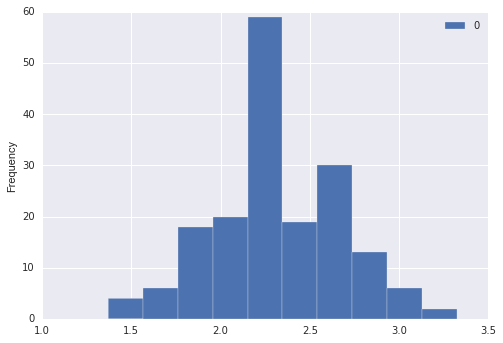

In [45]:
# Histogram of Entropy in Male names
e_male = filter(None,[gender_features(n)['entropy'] if (g=='male') else None for (n,g) in devtest_dataset])
print ("Male Mean: %4.2f" %statistics.mean(e_male))
print ("Male SD: %4.2f" %statistics.stdev(e_male))
pd.DataFrame(e_male).plot.hist()

Female Mean: 2.27
Female SD: 0.37


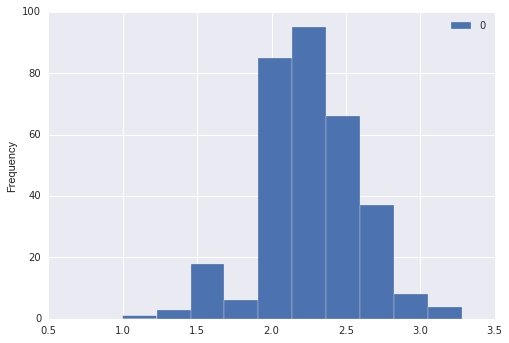

In [46]:
# Histogram of Entropy in Female names
e_female = filter(None,[gender_features(n)['entropy'] if (g=='female') else None for (n,g) in devtest_dataset])
print 'Female Mean: %4.2f' %statistics.mean(e_female)
print 'Female SD: %4.2f' %statistics.stdev(e_female)
pd.DataFrame(e_female).plot.hist()

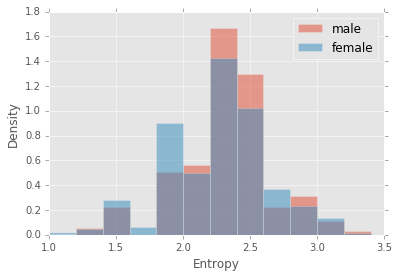

In [23]:
from matplotlib import pyplot
import numpy as np

#Alternative histogram plots using density and overlaying the two groups in one chart.
binwidth = 0.2
pyplot.hist(e_male, np.arange(min(min(e_male),min(e_female)), max(max(e_male),max(e_female)) \
                              + binwidth, binwidth), alpha=0.5, label="male", normed=True)
pyplot.hist(e_female, np.arange(min(min(e_male),min(e_female)), max(max(e_male),max(e_female)) \
                              + binwidth, binwidth), alpha=0.5, label="female", normed=True)
pyplot.legend(loc='upper right')
pyplot.xlabel('Entropy')
pyplot.ylabel('Density')
pyplot.show()

In [47]:
scipy.stats.ttest_ind(e_male,e_female)

Ttest_indResult(statistic=1.4909191968274809, pvalue=0.13661582489681476)

H0: There is no difference between the distribution means of entropy values according to gender.

Ha: There is a difference between the distribution means of entropy values according to gender.

With a p-value of 0.137, we fail to reject the null hypothesis and conclude that there is no statistical difference in the distribution of entropy values. However, the histograms appear to have a different configuration in regards to gender.

### Predictions

Let's run some predictions now:

In [25]:
preds = pd.DataFrame({'name':[f for (f,gender) in test_dataset],'observed':[gender for (f,gender) in test_dataset],'predicted': [classifier.classify(gender_features(n)) for (n,g) in test_dataset]})

In [26]:
pd.crosstab(preds.observed,preds.predicted)

predicted,female,male
observed,,
female,270,36
male,36,158


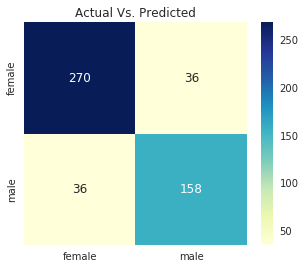

In [28]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
genderDf = pd.crosstab(preds.observed,preds.predicted)

genderDf = pd.DataFrame(genderDf)
genderArray = np.array([[genderDf.at['female','female'], genderDf.at['female','male']],
                   [genderDf.at['male','female'], genderDf.at['male','male']]])

genderCM = pd.DataFrame(genderArray, index = ['female','male'],
                  columns = ['female','male'])
plt.figure(figsize = (5,4))
ax = plt.axes()
sn.heatmap(genderCM, annot=True,cmap='YlGnBu', fmt='g', ax = ax)

ax.set_title('Actual Vs. Predicted')

# Testing With Real Data

Testing how well the algorithm predicted Male Vs Female with the top 1000 baby names from the US Social Security Administration for each year since 1880.

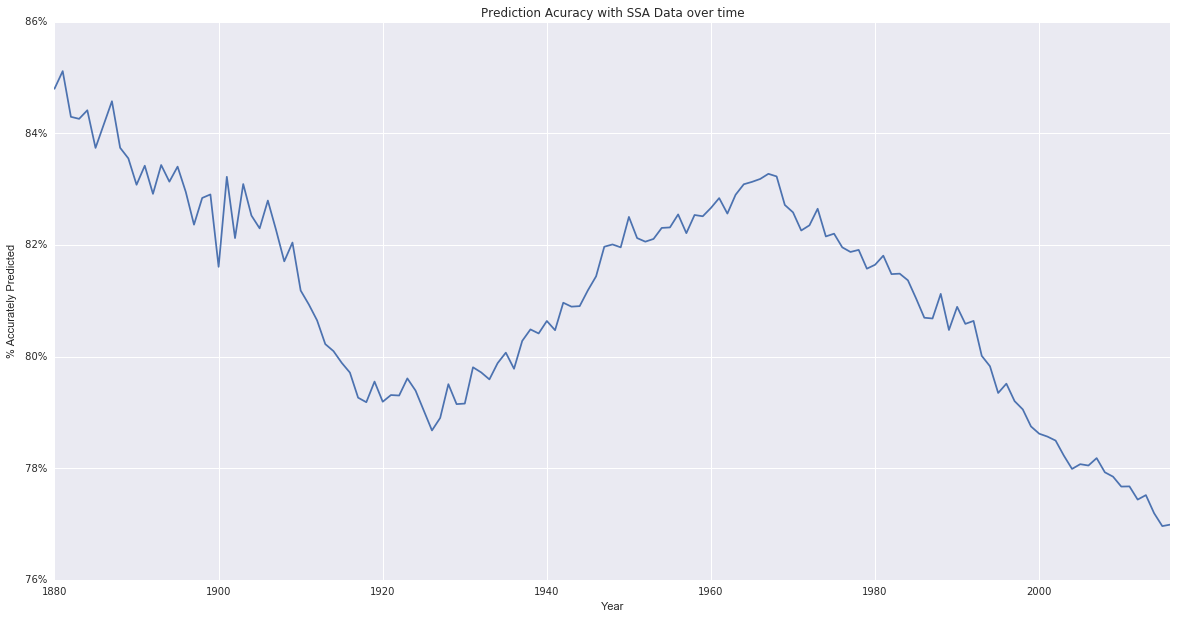

In [29]:
years = [] 
percents = [] 
from __future__ import division


for year in range(1880, 2017):
    url_base = "https://raw.githubusercontent.com/RaphaelNash/CUNY-DATA-620-WebAnalytics/master/Project3/names/yob"
    url = url_base + str(year) + ".txt"
    yob_df = pd.read_csv(url, header=None)
    yob_df["predicted_gender"] = yob_df[0].apply(lambda x:  classifier.classify(gender_features(x )))
    yob_df["predicted_gender"] = ['F' if x == 'female' else 'M' for x in yob_df['predicted_gender']]
    years.append(year)
    percents.append(len( yob_df [  yob_df['predicted_gender'] == yob_df[1]])/len(yob_df))
    
year_accuracy_df = pd.Series(percents, index = years)

ax = year_accuracy_df.plot(figsize=(20,10))

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
ax.get_xaxis().get_major_formatter().set_useOffset(False)

ax.set_title("Prediction Acuracy with SSA Data over time")
ax.set_xlabel('Year')
ax.set_ylabel('% Accurately Predicted')



## Model Building: N-Gram Tagging with Decision Trees
Tagging the name or parts of the name to determine the correct gender

In [30]:
just_names = ([(name) for name in names_ntlk.words('male.txt')] + [(name) for name in names_ntlk.words('female.txt')]) 
random.shuffle(just_names)

end_ngram_fdist = nltk.FreqDist()
for ngram in just_names:
    ngram = ngram.lower()
    end_ngram_fdist[ngram[-1:]] +=1
    end_ngram_fdist[ngram[-2:]] +=1
    end_ngram_fdist[ngram[-3:]] +=1
    end_ngram_fdist[ngram[-4:]] +=1

common_endings = [ending for (ending, count) in end_ngram_fdist.most_common(200)]

begin_ngram_fdist = nltk.FreqDist()
for ngram in just_names:
    ngram = ngram.lower()
    begin_ngram_fdist[ngram[:1]] +=1
    begin_ngram_fdist[ngram[:2]] +=1
    begin_ngram_fdist[ngram[:3]] +=1
    begin_ngram_fdist[ngram[:4]] +=1

common_beginnings = [begin for (begin, count) in begin_ngram_fdist.most_common(200)]

In [31]:
#Define feature extractor
def pos_features_both(word):
    features = {}
    for suffix in common_beginnings:
        features['startswith({})'.format(suffix)] = word.lower().startswith(suffix)
    for suffix in common_endings:
        features['endswith({})'.format(suffix)] = word.lower().endswith(suffix)
    return features

In [32]:
featuresets = [(pos_features_both(n), g) for (n,g) in names]

In [33]:
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]

In [34]:
DTclassifier = nltk.DecisionTreeClassifier.train(train_set)
nltk.classify.accuracy(DTclassifier, test_set)

0.7884130982367759

In [37]:
DTclassifier.classify(pos_features_both('Mauricio'))

'male'

### Model Performance

In [38]:
nltk.ConfusionMatrix([gender for (f,gender) in devtest_featureset], [DTclassifier.classify(pos_features_both(n)) for (n,g) in devtest_dataset])

<ConfusionMatrix: 406/500 correct>

In [39]:
DTpreds = pd.DataFrame({'name':[f for (f,gender) in test_dataset],'observed':[gender for (f,gender) in test_dataset],'predicted': [DTclassifier.classify(pos_features_both(n)) for (n,g) in test_dataset]})
pd.crosstab(DTpreds.observed,DTpreds.predicted)

predicted,female,male
observed,,
female,282,24
male,82,112


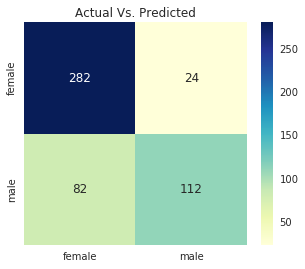

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
genderDf = pd.crosstab(DTpreds.observed,DTpreds.predicted)

genderDf = pd.DataFrame(genderDf)
genderArray = np.array([[genderDf.at['female','female'], genderDf.at['female','male']],
                   [genderDf.at['male','female'], genderDf.at['male','male']]])

genderCM = pd.DataFrame(genderArray, index = ['female','male'],
                  columns = ['female','male'])
plt.figure(figsize = (5,4))
ax = plt.axes()
sn.heatmap(genderCM, annot=True,cmap='YlGnBu', fmt='g', ax = ax)

ax.set_title('Actual Vs. Predicted')

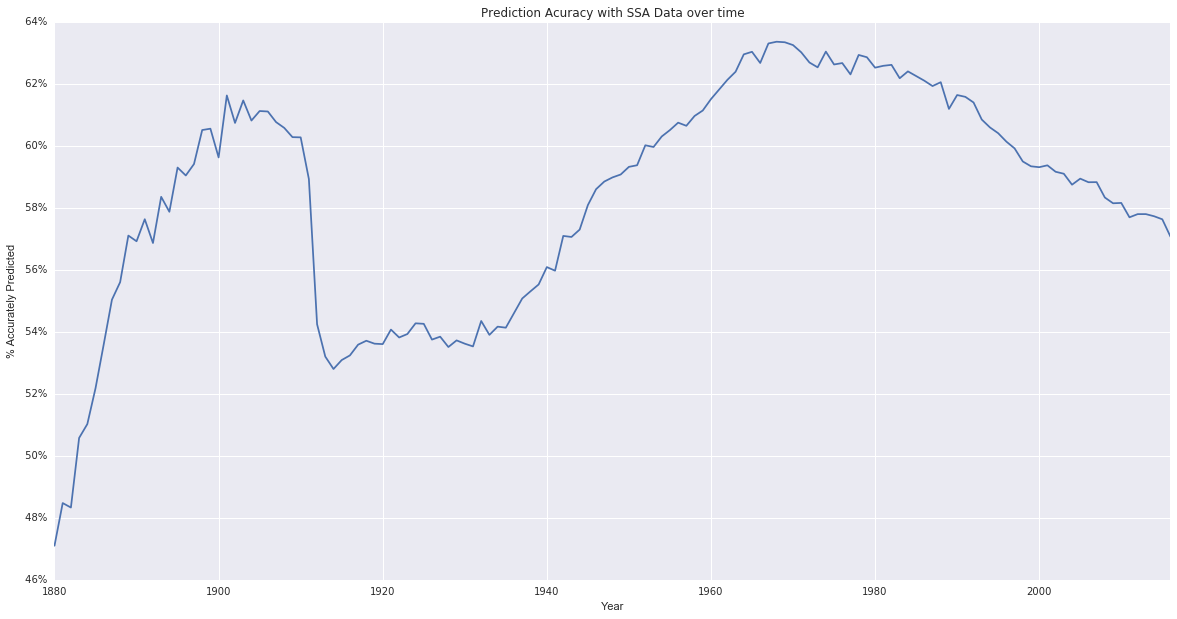

In [48]:
#  Prediction Accuracy over the Years

years = [] 
percents = [] 
from __future__ import division


for year in range(1880, 2017):
    url_base = "https://raw.githubusercontent.com/RaphaelNash/CUNY-DATA-620-WebAnalytics/master/Project3/names/yob"
    url = url_base + str(year) + ".txt"
    yob_df = pd.read_csv(url, header=None)
    yob_df["predicted_gender"] = yob_df[0].apply(lambda x:  DTclassifier.classify(gender_features(x )))
    yob_df["predicted_gender"] = ['F' if x == 'female' else 'M' for x in yob_df['predicted_gender']]
    years.append(year)
    percents.append(len( yob_df [  yob_df['predicted_gender'] == yob_df[1]])/len(yob_df))
    
year_accuracy_df = pd.Series(percents, index = years)

ax = year_accuracy_df.plot(figsize=(20,10))

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
ax.get_xaxis().get_major_formatter().set_useOffset(False)

ax.set_title("Prediction Acuracy with SSA Data over time")
ax.set_xlabel('Year')
ax.set_ylabel('% Accurately Predicted')

The model has a better chance correctly identifying female names than male ones. From the Prediction Accuracy plot above, we can see that around the 1980s, the ability to accurately predict names steadily declined, which may indicate that "neutral" names increased (ex. "Sam" being short for either "Samuel" or "Samantha"), or certain names previously considered as male newly classified as male (ex. "Max") or even that completely new names were created that did not follow any previous the classification rules (ex. "Indigo").